In [1]:
# ENGLISH CLASSIFIER

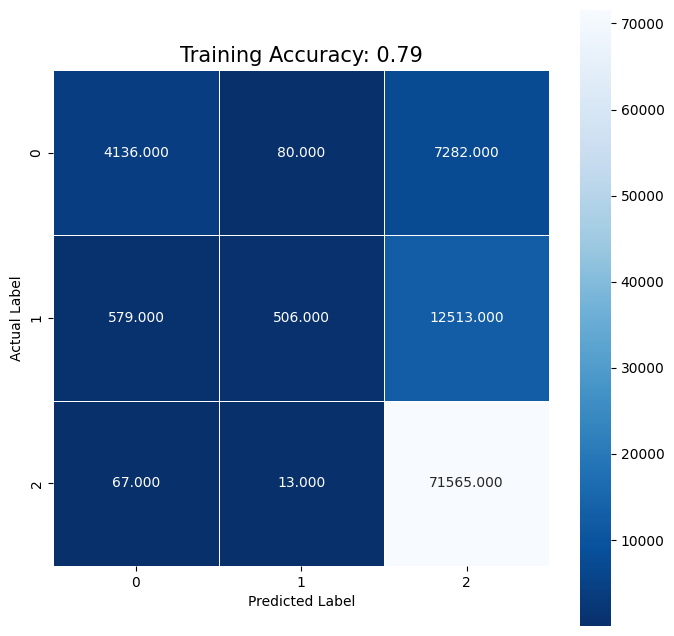

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Read data
df = pd.read_csv('englishmodel_cleaned.csv')

# Separate text and labels
x = df['normalized_text'] 
y = df['sentiment']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = tfidf_vectorizer.fit_transform(x)

# Split dataset 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

# Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Train classifier
y_pred_train = nb.predict(x_train)

# Evaluate classifier
conf_matrix = confusion_matrix(y_train, y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Training Accuracy: {0:.2f}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

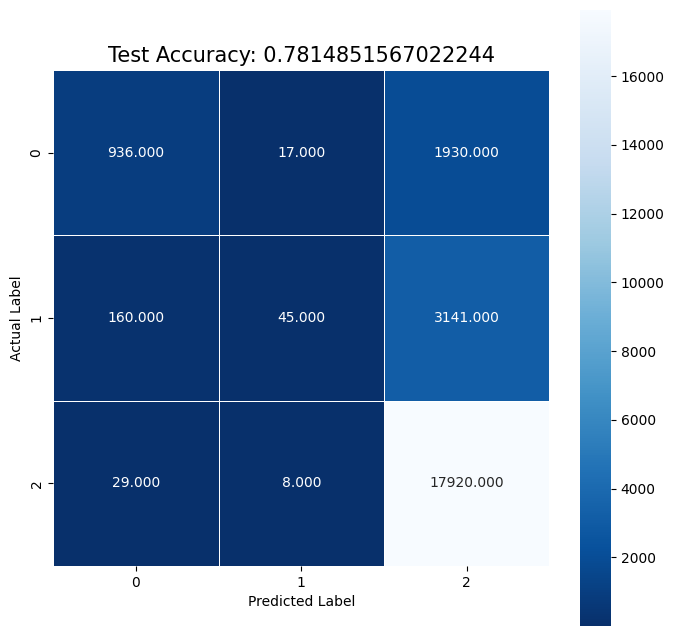

Classification Report:
               precision    recall  f1-score   support

          -1       0.83      0.32      0.47      2883
           0       0.64      0.01      0.03      3346
           1       0.78      1.00      0.88     17957

    accuracy                           0.78     24186
   macro avg       0.75      0.45      0.46     24186
weighted avg       0.77      0.78      0.71     24186



In [2]:
# Test classifier
y_pred_test = nb.predict(x_test)

# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
classification_rep = classification_report(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Test Accuracy: {0}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Print additional metrics
print("Classification Report:\n", classification_rep)

In [3]:
# IMPROVE MODEL ACCURACY - apply cross validation & manipulate hyperparameter

Fold 1:
Test Accuracy: 0.8089

Fold 2:
Test Accuracy: 0.8072

Fold 3:
Test Accuracy: 0.8107

Fold 4:
Test Accuracy: 0.8100

Fold 5:
Test Accuracy: 0.8085

Mean accuracy across all folds: 0.8090
Best hyperparameters: {'alpha': 0.1}


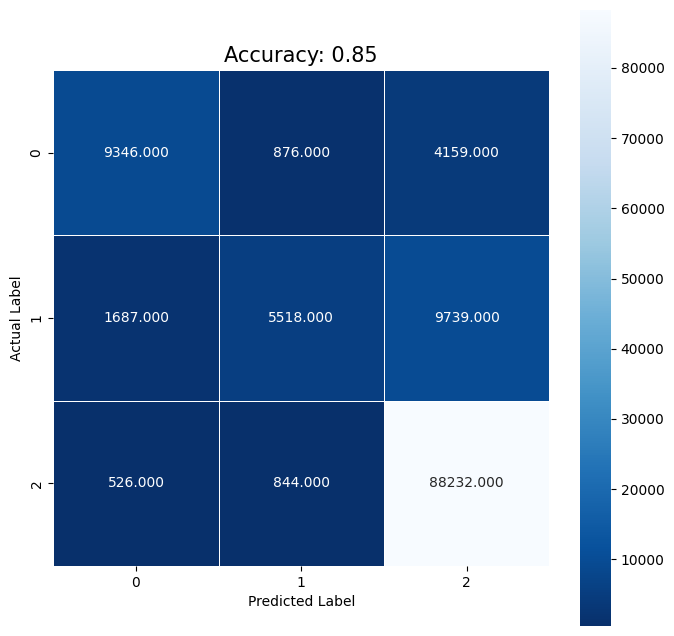

English NB Model's Accuracy
Classification Report:
               precision    recall  f1-score   support

          -1       0.81      0.65      0.72     14381
           0       0.76      0.33      0.46     16944
           1       0.86      0.98      0.92     89602

    accuracy                           0.85    120927
   macro avg       0.81      0.65      0.70    120927
weighted avg       0.84      0.85      0.83    120927



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read data
df = pd.read_csv('englishmodel_cleaned.csv')

# Separate text and labels
x = df['normalized_text']
y = df['sentiment']

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = tfidf_vectorizer.fit_transform(x)

# Initialize KFold with the number of splits
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the parameter grid for alpha values
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]}

# Initialize Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Initialize GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(classifier, param_grid, cv=kfold, scoring='accuracy')

# Initialize lists to store accuracy scores for each fold
accuracy_scores = []

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kfold.split(x)):
    print(f"Fold {fold + 1}:")
    
    # Split data into train and test sets
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Perform GridSearchCV on the training data
    grid_search.fit(x_train, y_train)
    
    # Get the best estimator from the grid search
    best_classifier = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred_test = best_classifier.predict(x_test)
    
    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_pred_test)
    accuracy_scores.append(fold_accuracy)
    
    # Print accuracy for the test set
    print(f"Test Accuracy: {fold_accuracy:.4f}\n")

# Calculate mean accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean accuracy across all folds: {mean_accuracy:.4f}")

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Evaluate classifier
conf_matrix = confusion_matrix(y, best_classifier.predict(x))
accuracy = accuracy_score(y, best_classifier.predict(x))
classification_rep = classification_report(y, best_classifier.predict(x))

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title('Accuracy: {0:.2f}'.format(accuracy), size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Print additional metrics
print("English NB Model's Accuracy\nClassification Report:\n", classification_rep)

In [5]:
# Read Adidas dataset for classification
adidas_df = pd.read_csv('Nikedataset_cleaned.csv')

# Separate text from the Adidas dataset
adidas_x = adidas_df['normalized_text']

# Transform the text data using the previously fitted TF-IDF vectorizer
adidas_x_transformed = tfidf_vectorizer.transform(adidas_x)

# Predict sentiments for the Adidas dataset
adidas_y_pred = best_classifier.predict(adidas_x_transformed)

# You can print the predicted labels if you don't have ground truth labels
print("Predicted Labels for Adidas Dataset:")
print(adidas_y_pred)


Predicted Labels for Adidas Dataset:
[1 0 1 ... 1 1 1]


In [6]:
# Concatenate predicted labels with the original DataFrame
adidas_df_with_predictions = adidas_df.copy()
adidas_df_with_predictions['predicted_sentiment'] = adidas_y_pred

adidas_df_with_predictions.head(50)


,created_at,username,full_text,cleaning,case_folding,tokenize,StopWord Removal,stemming_data,normalized_text,predicted_sentiment
0,Tue Feb 27 18:14:53 +0000 2024,bug4bug_,walked down the street with my dogs rn nd saw ...,walked down the street with my dogs rn nd saw ...,walked down the street with my dogs rn nd saw ...,"['walked', 'down', 'the', 'street', 'with', 'm...","['walked', 'street', 'dogs', 'rn', 'nd', 'saw'...",walked street dogs rn nd saw guy nike logo shi...,walked street dogs rn nd saw guy nike logo shi...,1
1,Tue Feb 27 18:07:34 +0000 2024,FanaticsSucks,@novy_williams @MLB @Nike @Fanatics We've now ...,Weve now reached the point of referring to...,weve now reached the point of referring to...,"['weve', 'now', 'reached', 'the', 'point', 'of...","['weve', 'reached', 'point', 'referring', 'dis...",weve reached point referring dissatisfied cust...,weve reached point referring dissatisfied cust...,0
2,Tue Feb 27 17:59:35 +0000 2024,DirectingBarca,FC Barcelona say that they cannot close their...,FC Barcelona say that they cannot close their...,fc barcelona say that they cannot close their...,"['fc', 'barcelona', 'say', 'that', 'they', 'ca...","['fc', 'barcelona', 'say', 'cannot', 'close', ...",fc barcelona say cannot close contract nike pu...,fc barcelona say cannot close contract nike pu...,1
3,Tue Feb 27 17:54:48 +0000 2024,ManagingBarca,FC Barcelona say that they cannot terminate t...,FC Barcelona say that they cannot terminate t...,fc barcelona say that they cannot terminate t...,"['fc', 'barcelona', 'say', 'that', 'they', 'ca...","['fc', 'barcelona', 'say', 'cannot', 'terminat...",fc barcelona say cannot mate contract nike pum...,fc barcelona say cannot mate contract nike pum...,1
4,Tue Feb 27 17:27:36 +0000 2024,p_to_the_j_,@JustJewelMay a L/XL you know i still have all...,a LXL you know i still have all my nikeUA stu...,a lxl you know i still have all my nikeua stu...,"['a', 'lxl', 'you', 'know', 'i', 'still', 'hav...","['lxl', 'know', 'still', 'nikeua', 'stuff', 'l...",lxl know still nikeua stuff lucky sc shirt,lxl know still nikeua stuff lucky sc shirt,1
5,Tue Feb 27 17:25:46 +0000 2024,jrdmcbroom,This might be the furthest thing from a replic...,This might be the furthest thing from a replic...,this might be the furthest thing from a replic...,"['this', 'might', 'be', 'the', 'furthest', 'th...","['might', 'furthest', 'thing', 'replica', 'eve...",might furthest thing replica ever seen navy sh...,might furthest thing replica ever seen navy sh...,1
6,Tue Feb 27 17:22:02 +0000 2024,balcony_shirts,Surely they can t make a shirt like that 5 yea...,Surely they can t make a shirt like that year...,surely they can t make a shirt like that year...,"['surely', 'they', 'can', 't', 'make', 'a', 's...","['surely', 'make', 'shirt', 'like', 'years', '...",surely make shirt like years one black shirt r...,surely make shirt like years one black shirt r...,1
7,Tue Feb 27 16:26:13 +0000 2024,Jerseyforum,@yohmartino @ekiiiiw NFL kalo kainnya gak tebe...,NFL kalo kainnya gak tebel sih abis tuh baju...,nfl kalo kainnya gak tebel sih abis tuh baju...,"['nfl', 'kalo', 'kainnya', 'gak', 'tebel', 'si...","['nfl', 'kalo', 'kainnya', 'gak', 'tebel', 'si...",nfl kalo kain gak tebel sih abis tuh baju lapa...,nfl kalo kain gak tebel sih abis tuh baju lapa...,1
8,Tue Feb 27 16:13:55 +0000 2024,DillyLegs,@wearebayfc Lol Nike strikes out again. It's a...,Lol Nike strikes out again Its a black and wh...,lol nike strikes out again its a black and wh...,"['lol', 'nike', 'strikes', 'out', 'again', 'it...","['lol', 'nike', 'strikes', 'black', 'white', '...",lol nike strikes black white tee shirt orangut...,lol nike strikes black white tee shirt orangut...,1
9,Tue Feb 27 15:45:17 +0000 2024,NYCRepublicanss,Check out Supreme CREAM L/S t shirt hoodie Siz...,Check out Supreme CREAM LS t shirt hoodie Size...,check out supreme cream ls t shirt hoodie size...,"['check', 'out', 'supreme', 'cream', 'ls', 't'...","['check', 'supreme', 'cream', 'ls', 'shirt',

In [7]:
# Count occurrences of each predicted sentiment
sentiment_counts = adidas_df_with_predictions['predicted_sentiment'].value_counts()

# Print the counts
print("Count of Predicted Sentiments:")
print(sentiment_counts)


Count of Predicted Sentiments:
predicted_sentiment
 1    31183
-1     1650
 0     1182
Name: count, dtype: int64


NB Accuracy Score: 0.8085

              precision    recall  f1-score       support
-1             0.708473  0.576254  0.635560   2931.000000
0              0.518127  0.200000  0.288599   3430.000000
1              0.838892  0.963757  0.897000  17824.000000
accuracy       0.808476  0.808476  0.808476      0.808476
macro avg      0.688497  0.580004  0.607053  24185.000000
weighted avg   0.777595  0.808476  0.779030  24185.000000


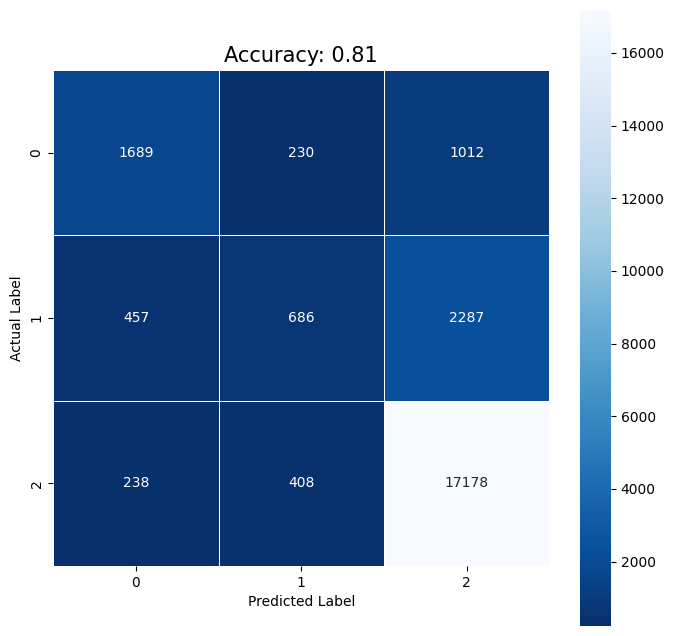

In [8]:
# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
classification_rep = classification_report(y_test, y_pred_test, output_dict=True)

# Print confusion matrix and classification report
print(f"NB Accuracy Score: {accuracy:.4f}\n")
print(pd.DataFrame(classification_rep).transpose())

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues_r')
plt.title(f'Accuracy: {accuracy:.2f}', size=15)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()